<h1><b>Ο Αλγόριθμος k-means</b></h1>
<p align="justify">Στην άσκηση αυτή θα μελετήσετε τον αλγόριθμο <a href="https://en.wikipedia.org/wiki/K-means_clustering"><i>k-means</i></a>, κατασκευάζοντας ένα σύντομο πρόγραμμα. Για την παρούσα άσκηση θα χρησιμοποιήσετε τη βιβλιοθήκη <i>Scikit-Learn</i> της <i>Python</i>. Συγκεκριμένα, θα διαχωρίσετε σε <i>συστάδες (clusters)</i> 150 δείγματα του φυτού <i>Ίρις</i> με βάση τα δεδομένα που σας δίνονται στο τέλος της εκφώνησης και με βάση αυτό μπορείτε να χτίσετε και το ενιαίο πρόγραμμα που θα σας ζητηθεί. Τα <i>χαρακτηριστικά (features)</i> που περιλαμβάνονται στο <i>dataset</i> και που περιγράφουν το κάθε δείγμα είναι τα εξής: το <i>μήκος του Σέπαλου (sepal length)</i>, το <i>πλάτος του Σέπαλου (sepal width)</i>, το <i>μήκος των Πετάλων (petal length)</i> και το <i>πλάτος των Πετάλων (petal width)</i>.</p>
<p>Καλείστε να αναπτύξετε ένα ενιαίο πρόγραμμα που να κάνει τα παρακάτω:</p>
<ul>
<li>Να υλοποιεί την μέθοδο <a href="https://en.wikipedia.org/wiki/Elbow_method_(clustering)"><i>«Elbow»</i></a> στο σύνολο δεδομένων του φυτού <i>Ίρις</i>, ώστε να εντοπίσετε τον βέλτιστο αριθμό των <i>συστάδων</i>. Τι παρατηρείτε;</li>
<li>Να υλοποιεί τον αλγόριθμο <i>k-means</i> με βάση το βέλτιστο αριθμό <i>συστάδων</i> που βρήκατε στο προηγούμενο ερώτημα. Περιγράψτε πως λειτουργεί ο αλγόριθμος.</li>
<li>Να σχεδιάσετε τις πραγματικές κλάσεις, καθώς και τις κλάσεις που προκύπτουν από το μοντέλο <i>k-means</i>. Τι παρατηρείτε;</li>
<li>Επιχειρήστε να υλοποιήσετε ελέγχους σχετικά με την απόδοση του αλγορίθμου
(<i>Ακρίβειας – Accuracy</i>, <a href="https://en.wikipedia.org/wiki/Confusion_matrix"><i>Τιμές Μήτρας Λαθών – Error Matrix</i></a>). Αναλύστε τα
αποτελέσματα. Πριν υλοποιήσετε τους ελέγχους, να λάβετε υπόψη το γεγονός ότι οι
αριθμοί που χρησιμοποιούνται στο <i>iris.target</i> για τα είδη του φυτού, δεν έχουν καμία σχέση με τους αριθμούς που χρησιμοποιούνται από το μοντέλο <i>k-means</i> για τον ορισμό των <i>clusters</i>.</li>
</ul>

In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.stats import mode

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import some data to play with (from sklearn)
iris = datasets.load_iris()

In [3]:
#print is optional
print(iris.data)
iris.feature_names
print(iris.target)
iris.target_names

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [5]:
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

Αρχικά, θα υλοποιήσουμε την μέθοδο Elbow, στο σύνολο των δεδομένων, για την καταλληλότερη επιλογή του αριθμού των συστάδων, δοκιμάζοντας k = 1:10. Για την αποτελεσματικότητα του KMeans θα χρησιμοποιήσουμε το κριτήριο inertia, το οποίο και προσπαθεί να ελαχιστοποιήσει ο αλγόριθμος.

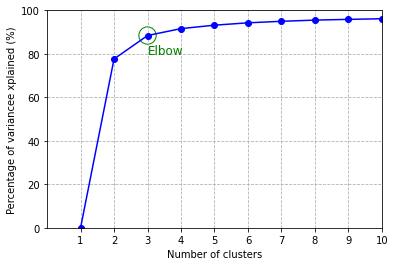

In [6]:
def plot_elbow(inertias):
    plt.plot(k, explained_var, '-bo')
    plt.xlabel("Number of clusters")
    plt.ylabel("Percentage of variancee xplained (%)")
    plt.xlim(0, len(k))
    plt.ylim(0, 100)
    plt.xticks(k)
    plt.grid(linestyle='--')
    plt.show()
    
#number of clusters
k = range(1, 11)
inertias = [KMeans(n_clusters = i).fit(x).inertia_ for i in k]
explained_var  = [100 * (1 - (inertia / inertias[0])) for inertia in inertias]
plt.scatter(3, explained_var[2], s=300, facecolors="none", edgecolors='g')
plt.annotate("Elbow", xy=(3, explained_var[2]), xytext=(3, 80), color="green", size=12)
plot_elbow(inertias)

Βασιζόμενοι λοιπόν στο παραπάνω διάγραμμα, παρατηρούμε ότι ο βέλτιστος αριθμός συστάδων είναι k = 3. Αυτό προκύπτει από το κριτήριο Elbow, κατά το οποίο ο επιθυμητός αριθμός συστάδων είναι που προσθέτωντας μια επιπλέον συστάδα, δεν κερδίζουμε τίποτα το ιδιαίτερο στο ποσοστό ερμήνευσης της διασποράς (explained variance).

Κατόπιν υλοποιείται ο αλγόριθμος K-Means, χρησιμοποιώντας την υλοποίηση της βιβλιοθήκης Scikit-Learn της Python, με αριθμό συστάδων k = 3. <br>
Η βασική λειτουργία του αλγορίθμου είναι η εξής:  <br>
 1) επιλέγονται τυχαία k κέντρα  <br>
 2) σε κάθε σημείο ανατίθεται ένα label με βάση το πλησιέστερο (ελάχιστη ευκλείδια απόσταση) κέντρο σε αυτό  <br>
 3) ανανέωση των κέντρων ως τον μέσο όρο των σημείων ανά cluster, όπως υπολογίστηκε στο βήμα 2  <br>
 4) επανάληψη διαδικασίας έως ότου ικανοποιηθεί κάποιο κριτήριο σύγκλισης (π.χ. σε 2 iterations του αλγορίθμου να μην αλλάξει label κάποιο από τα σημεία του dataset)

In [7]:
k = 3 # number of clusters
kmeans = KMeans(n_clusters = k).fit(x)
x["KMeans"] = kmeans.predict(x)

In [8]:
labels = np.zeros_like(x["KMeans"])
#correct the resulting labels
for i in range(3):
    mask = (x["KMeans"] == i)
    labels[mask] = mode(y.Targets[mask])[0]
x["KMeans"] = labels

Εν συνεχεία, σχεδιάζονται οι πραγματικές κλάσεις των στοιχείων, καθώς και εκείνες που προκύπτουν έπειτα από την εφαρμογή του K-Means. 

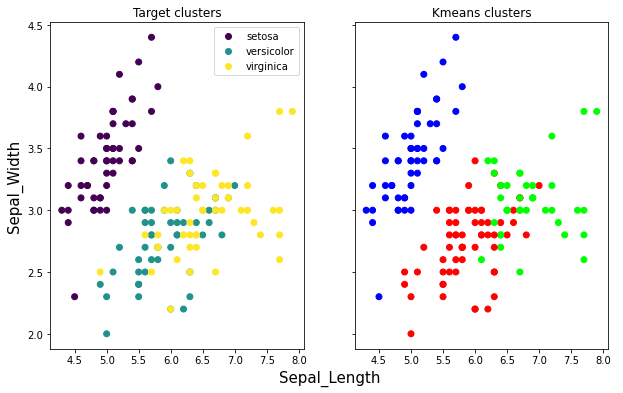

In [9]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,6))
scatter = axs[0].scatter(x.iloc[:,0], x.iloc[:,1], c = y["Targets"])
legend_1 = axs[0].legend(*scatter.legend_elements(), loc = "best")
for i, t in enumerate(iris.target_names):
    legend_1.get_texts()[i].set_text(t)
#axs[0].add_artist(legend_1)
axs[1].scatter(x.iloc[:,0], x.iloc[:,1], c = x["KMeans"], cmap="brg")

axs[0].set_title("Target clusters")
axs[1].set_title("Kmeans clusters")

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel(x.columns[0], size = 15)
plt.ylabel(x.columns[1], size = 15)
plt.show()

Παρατηρούμε ότι το cluster για το setosa είναι τέλειο, ενώ στα άλλα δύο υπάρχει ένα μικρό σφάλμα.

Ακολούθως, θα υπολογίσουμε την επίδοση (accuracy) που επιτυγχάνει ο αλγόριθμος K-Means, με βάση τα πραγματικά labels των 
στοιχείων του dataset.

In [10]:
print("KMeans' accuracy is: {:.4f} %".format(100*accuracy_score(y.Targets, labels)))

KMeans' accuracy is: 89.3333 %


Τέλος, παρουσιάζομαι το αντίστοιχο Confusion Matrix. Σαφώς παρατηρούμε ότι κλάση setosa έχει προβλεφθεί σωστά 100%, όπως είδαμε και από τα παραπάνω διαγράμματα. Η κλάση virginica επίσης ταξινομείται σχεδόν τέλεια, ενώ περίπου το 1/4 της κλάσης versicolor ταξινομούνται λανθασμένα ως virginica.

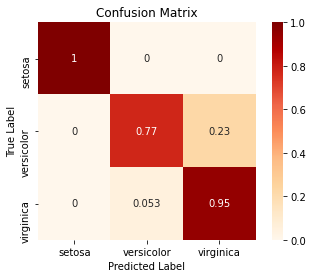

In [11]:
mat = confusion_matrix(x["KMeans"], y["Targets"], normalize = 'true')
sns.heatmap(mat, square = True, annot = True, cmap = "OrRd", xticklabels = iris.target_names, yticklabels = iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()